# Import Statements

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

In [2]:
sns.set_style("darkgrid")

# Load Data

In [3]:
df = pd.read_csv("../data/Iris.csv")
df = df.drop("Id", axis=1)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Classification: Scatter Plot and Splits

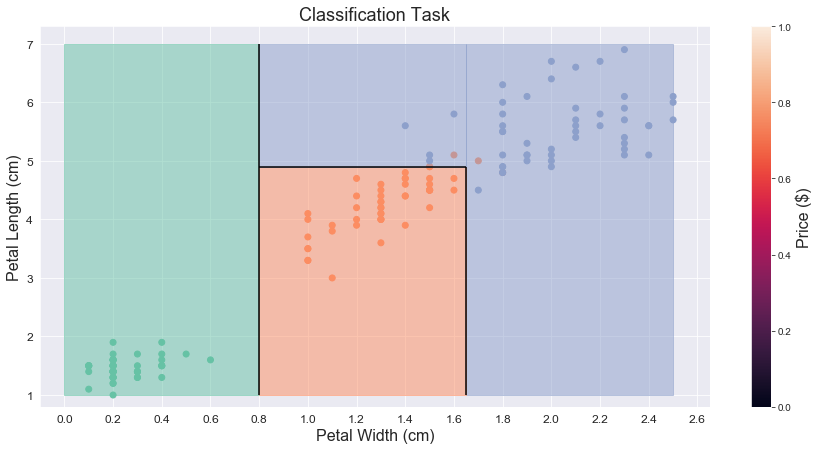

In [5]:
# create colors for dots of scatter plot
color_key = {"Iris-setosa": "#66c2a5",
             "Iris-versicolor": "#fc8d62",
             "Iris-virginica": "#8da0cb"}
colors = df.species.map(color_key)

# scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(x=df.petal_width,
            y=df.petal_length,
            c=colors)

# colorbar
cbar = plt.colorbar()
cbar.set_label("Price ($)", fontsize=16)

# customization
plt.xticks(ticks=np.arange(0, 2.8, 0.2), fontsize=12)
plt.yticks(fontsize=12)
plt.xlim((-0.1, 2.65))
plt.ylim((0.8, 7.3))
plt.xlabel("Petal Width (cm)", fontsize=16)
plt.ylabel("Petal Length (cm)", fontsize=16)
plt.title("Classification Task", fontsize=18)

## decision boundaries
# first boundary
plt.vlines(0.8, 1, 7);
plt.fill_between([0, 0.8], 7, 1, alpha=0.5, color="#66c2a5");

# second boundary
plt.vlines(1.65, 1, 4.9);
plt.fill_between([1.65, 2.5], 7, 1, alpha=0.5, color="#8da0cb");

# third boundary
plt.hlines(4.9, 0.8, 1.65);
plt.fill_between([0.8, 1.65], 4.9, 1, alpha=0.5, color="#fc8d62")
plt.fill_between([0.8, 1.65], 7, 4.9, alpha=0.5, color="#8da0cb");

# plt.savefig("../../classification task 1.png", bbox_inches='tight')

# Create continuous Label: Price

In [6]:
def create_price(species):
    if species == "Iris-setosa":
        price = np.random.randint(low=200, high=400) / 100
        return price
    else:
        price = np.random.randint(low=600, high=1_000) / 100
        return price

In [7]:
# np.random.seed(6)
np.random.seed(95)

df["price"] = df.species.apply(create_price)
df = df.drop_duplicates("price")

# Helper functions

In [8]:
def calculate_mse(actuals):
    prediction = actuals.mean()
    mse = np.mean((actuals - prediction) ** 2)
    
    return mse

In [9]:
def calculate_entropy(pandas_series):
    _, counts = np.unique(pandas_series, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [10]:
def calculate_weighted_metric(split, feature, metric_function):
    df_below = df[df[feature] <= split]
    df_above = df[df[feature] >  split]

    metric_below = metric_function(df_below.price)
    metric_above = metric_function(df_above.price)

    p_below = len(df_below) / len(df)
    p_above = len(df_above) / len(df)

    weighted_metric = p_below * metric_below + p_above * metric_above
    
    metric_below = round(metric_below, ndigits=2)
    metric_above = round(metric_above, ndigits=2)
    weighted_metric = round(weighted_metric, ndigits=2)
        
    return metric_below, metric_above, weighted_metric

In [11]:
def determine_splits(pandas_series):
    unique_values = np.unique(pandas_series)
    unique_values_rolled = np.roll(unique_values, -1)

    # split should be in the middle of two values
    splits = (unique_values + unique_values_rolled) / 2
    splits = splits[:-1]
    
    return splits

# Regression: Scatter Plot and Splits

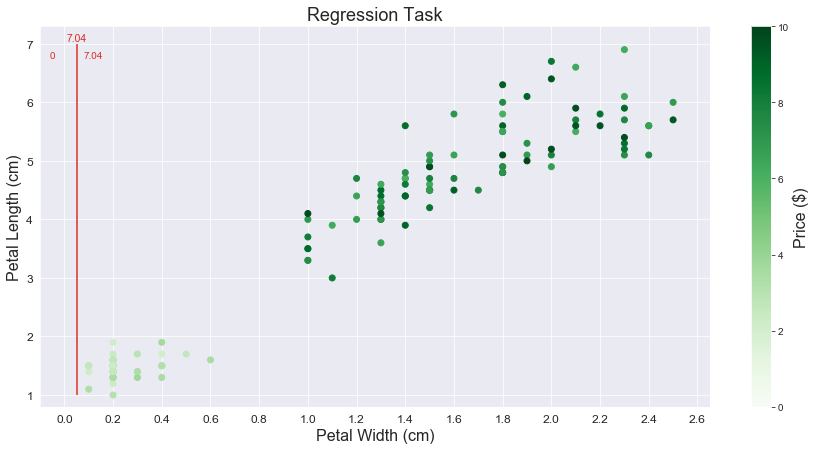

In [12]:
# scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(x=df.petal_width,
            y=df.petal_length,  
            c=df.price, 
            cmap="Greens",
            vmin=0,
            vmax=10)

# colorbar
cbar = plt.colorbar()
cbar.set_label("Price ($)", fontsize=16)

# customization
plt.xticks(ticks=np.arange(0, 2.8, 0.2), fontsize=12)
plt.yticks(fontsize=12)
plt.xlim((-0.1, 2.65))
plt.ylim((0.8, 7.3))
plt.xlabel("Petal Width (cm)", fontsize=16)
plt.ylabel("Petal Length (cm)", fontsize=16)
plt.title("Regression Task", fontsize=18)

# plot splits
show_edge_cases = True  # set to True to only plot edge cases of the splits
show_one_split = True   # set to True to only plot one split
show_split_i = 21       # chose which split to plot

splits = list(determine_splits(df.petal_width))
edge_case_splits = [0.05, 2.55]

if show_edge_cases:
    splits = splits + edge_case_splits
    
for i, split in enumerate(splits):
    if show_one_split and i != show_split_i:
        continue
    else:
        metric_left, metric_right, weighted_metric = calculate_weighted_metric(split, feature="petal_width", metric_function=calculate_entropy)

        if show_edge_cases:
            if split in edge_case_splits or split == 1.35:
                plt.vlines(split, 1, 7, color="#de2d26")
                plt.text(split-0.11, 6.75, metric_left, color="#de2d26")
                plt.text(split+0.03, 6.75, metric_right, color="#de2d26")
                plt.text(split-0.04, 7.05, weighted_metric, fontsize=10.5, color="#de2d26")
        else:
            plt.vlines(split, 1, 7)
            plt.text(split-0.04, 7.05, weighted_metric, fontsize=10.5)

# plt.savefig(f"../../regression task 1.png", bbox_inches='tight')